In [1]:
import os
import warnings

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import torch
import pandas as pd
import matplotlib.pyplot as plt

# handle warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
cwd = os.getcwd()
air_data = pd.read_csv(f'{cwd}/AirQualityUCI/AirQualityUCI.csv', sep=';')
air_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [3]:
to_drop = [
    'Date', 
    'Time', 
    'PT08.S1(CO)', 
    'PT08.S2(NMHC)', 
    'PT08.S3(NOx)', 
    'PT08.S4(NO2)', 
    'Unnamed: 15', 
    'Unnamed: 16'
]
air_data = air_data.drop(to_drop, axis=1)
air_data.columns
before_dropna = len(air_data)

air_data = air_data[~air_data.eq(-200)] # replace all -200 (empty) as NaN
air_data = air_data[~air_data.eq('-200')]
air_data = air_data.dropna()
air_data = air_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.')))
after_dropna = len(air_data)
air_dtypes = air_data.dtypes

print(f'Rows before dropna: {before_dropna}')
print(f'Rows after dropna: {after_dropna}')
print(f'\nData Types: \n{air_dtypes}')
air_data.head()

Rows before dropna: 9471
Rows after dropna: 827

Data Types: 
CO(GT)         float64
NMHC(GT)       float64
C6H6(GT)       float64
NOx(GT)        float64
NO2(GT)        float64
PT08.S5(O3)    float64
T              float64
RH             float64
AH             float64
dtype: object


,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),PT08.S5(O3),T,RH,AH
0,2.6,150.0,11.9,166.0,113.0,1268.0,13.6,48.9,0.7578
1,2.0,112.0,9.4,103.0,92.0,972.0,13.3,47.7,0.7255
2,2.2,88.0,9.0,131.0,114.0,1074.0,11.9,54.0,0.7502
3,2.2,80.0,9.2,172.0,122.0,1203.0,11.0,60.0,0.7867
4,1.6,51.0,6.5,131.0,116.0,1110.0,11.2,59.6,0.7888


In [4]:
features = [
    'CO(GT)', 
    'NMHC(GT)', 
    'C6H6(GT)', 
    'NOx(GT)', 
    'NO2(GT)', 
    'T', 
    'RH', 
    'AH'
]
air_features = air_data[features]
air_features.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
0,2.6,150.0,11.9,166.0,113.0,13.6,48.9,0.7578
1,2.0,112.0,9.4,103.0,92.0,13.3,47.7,0.7255
2,2.2,88.0,9.0,131.0,114.0,11.9,54.0,0.7502
3,2.2,80.0,9.2,172.0,122.0,11.0,60.0,0.7867
4,1.6,51.0,6.5,131.0,116.0,11.2,59.6,0.7888


In [5]:
air_target = air_data[['PT08.S5(O3)']]
air_target.head()

,PT08.S5(O3)
0,1268.0
1,972.0
2,1074.0
3,1203.0
4,1110.0


In [6]:
scalable_cols = air_features.columns

# standardize the numeric values which allows stability during training
# preprocessing.scale = (col mean) - (all elements)/(col std dev)
air_features[scalable_cols] = preprocessing.scale(air_features[scalable_cols])
air_features.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
0,0.174943,-0.388917,0.152273,0.275105,0.404769,-0.415033,-0.009843,-0.415098
1,-0.250998,-0.571315,-0.184943,-0.495252,-0.262432,-0.477243,-0.088493,-0.596154
2,-0.109018,-0.686514,-0.238897,-0.152871,0.436541,-0.767556,0.324418,-0.457699
3,-0.109018,-0.724913,-0.211920,0.348473,0.690713,-0.954186,0.717667,-0.253100
4,-0.534959,-0.864111,-0.576113,-0.152871,0.500084,-0.912712,0.691451,-0.241329


In [7]:
X_train, x_test, Y_train, y_test = train_test_split(
    air_features, 
    air_target, 
    test_size=0.05,
    random_state=0
)

In [8]:
# convert pandas df to pytorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

print(f'Input data size: {X_train_tensor.shape}')
print(f'Output data size: {Y_train_tensor.shape}')

Input data size: torch.Size([785, 8])
Output data size: torch.Size([785, 1])


In [9]:
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001

model = torch.nn.Sequential(
    torch.nn.Linear(8, 100), 
    torch.nn.Sigmoid(), 
    torch.nn.Linear(100, 1),
)

In [10]:
# training
for iter in range(1, 100001):
    y_pred = model(X_train_tensor) # on forward pass calc y_pred by applying a model to input training data
    loss = loss_fn(y_pred, Y_train_tensor)
    
    if iter % 10000 == 0:
        print(f'Iteration: {iter}, Loss: {int(loss.item())}')
        
    model.zero_grad() # zero out grad before backward pass
    loss.backward()
    
    # update model params
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

Iteration: 10000, Loss: 8216
Iteration: 20000, Loss: 6795
Iteration: 30000, Loss: 5958
Iteration: 40000, Loss: 5433
Iteration: 50000, Loss: 5052
Iteration: 60000, Loss: 4782
Iteration: 70000, Loss: 4567
Iteration: 80000, Loss: 4391
Iteration: 90000, Loss: 4243
Iteration: 100000, Loss: 4113


In [11]:
sample = x_test.iloc[23]
sample_tensor = torch.tensor(
    sample.values, 
    dtype = torch.float
)

In [15]:
y_pred = model(sample_tensor)
print(f'Predicted air quality: {int(y_pred.item())}')
print(f'Actual air quality: {int(y_test.iloc[23])}')

Predicted air quality: 1095
Actual air quality: 1200


In [16]:
y_pred_tensor = model(x_test_tensor) # test predictions on full model
y_pred = y_pred_tensor.detach().numpy() # detach and convert to np array

torch.save(model, 'air_quality_model')

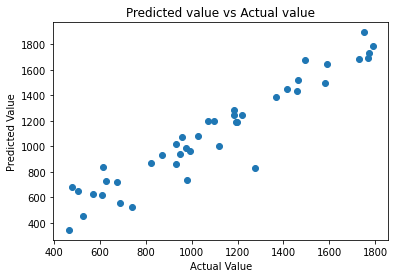

In [17]:
plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Predicted value vs Actual value")
plt.show()